In [1]:
from kinetic_measure import *
import plot_property_map as ppm
import pynbody
import numpy as np
import scipy.optimize as so
import scipy.stats as ss
import os


In [2]:
import kinetic_measure as km

In [3]:
import imp
imp.reload(km)

<module 'kinetic_measure' from '/home/seoyoung/scripts/kinetic_measure.py'>

In [4]:
savedir = '/home/seoyoung/analysis/long_slit/'

simdir = '/scratch/trq/cosmo25/'
param_file = '/scratch/trq/cosmo25/cosmo25p.768sg1bwK1BHe75_v4.param'
filelist = os.listdir(simdir)

In [5]:
result = [i[-6:] for i in filelist if i.startswith('cosmo25p.') and len(i)==31]
result.sort()



In [6]:
imp.reload(km)

<module 'kinetic_measure' from '/home/seoyoung/scripts/kinetic_measure.py'>

In [49]:
filt_size = 35
n_dir = 10
nbins = 15
#snap = result[::-1][0]
snap = result[::-1][15] #redshift 0.25


data_file = simdir+'cosmo25p.768sg1bwK1BHe75.'+snap
s = pynbody.load(data_file, paramfile = param_file)
s.physical_units()


In [51]:
filt_size = 35
n_dir = 10
nbins = 15
snap = result[::-1][0]
#snap = result[::-1][15] #redshift 0.25


data_file = simdir+'cosmo25p.768sg1bwK1BHe75.'+snap
s = pynbody.load(data_file, paramfile = param_file)
s.physical_units()


In [52]:
s.properties['z']

-7.465139617579553e-12

In [53]:

print("get halos")
h = s.halos()


get halos


In [54]:
len(h)

103222

In [59]:
np.log10(h0.properties['M_star'])

10.765602995926992

In [58]:
np.log10(np.sum(h0.star['mass']))

SimArray(10.934613, dtype=float32, 'Msol')

In [60]:
i = 0
mhal_list = []
mgal_list = []
i_list = []
#while mhal>10:
for i in range(1,len(h)+1):
    mhal = np.log10(np.sum(h[i].dm['mass']))
    if h[i].properties['hostHalo']==0 and mhal>12:
        mhal_list.append(mhal)
        mgal_list.append(np.log10(np.sum(h[i].star['mass'])))
        i_list.append(i)
        print(i,mhal)
    
mhal_list = np.array(mhal_list)
mgal_list = np.array(mgal_list)
i_list = np.array(i_list)

np.savetxt("/home/seoyoung/analysis/romulus25_group_candidates_z0.txt",np.vstack((i_list, mhal_list, mgal_list)).T)

1 12.2307
1241 12.376305
13455 12.352613
14620 12.565326
18714 12.854472
27666 12.491754
30900 12.198825
33188 12.084386
34449 12.25609
36816 12.120924
38182 12.6434765
39963 12.417434
42778 12.847373
49047 12.562673
49510 13.069158
52024 13.251654
61270 12.918867
65502 13.245026
66689 12.22028
67526 12.531997
74833 12.218332
77876 12.333263
79654 12.979491
81595 12.526895
82151 13.107184
83200 12.0815525
87235 12.148592
87956 12.44906
89615 12.710699
90266 12.219522
91655 12.354979
97045 12.544898
97408 12.267348
98808 12.132684
99966 12.814019


In [68]:
group_data = np.loadtxt("/home/seoyoung/analysis/romulus25_group_candidates_z0.txt", dtype = [('id_hal', float), ('mhal', float),('mgal',float)])

In [73]:
group_data['mhal']-group_data['mgal']

array([1.21829128, 1.3049469 , 1.41674232, 1.24325085, 1.26998806,
       1.21656895, 1.12812328, 1.32151031, 1.36503029, 1.23453903,
       1.42019176, 1.30565929, 1.22905636, 1.25059605, 1.51668549,
       1.42763519, 1.28311157, 1.47383404, 1.3218174 , 1.16710186,
       1.21188736, 1.1410265 , 1.37724209, 1.37861633, 1.28192711,
       1.27727699, 1.26482773, 1.42639446, 1.51944923, 1.36200047,
       1.19179821, 1.30999184, 1.26466751, 1.41393948, 1.3530407 ])

In [90]:
h0.star['mass'].in_units('Msol')/h0.star['mass'].in_units('Msol h**-1')


SimArray([1.4755942, 1.475594 , 1.475594 , ..., 1.4755942, 1.4755942,
          1.4755942], dtype=float32, 'h')

In [92]:
-np.log10(s.properties['h'])

0.16896690354321325

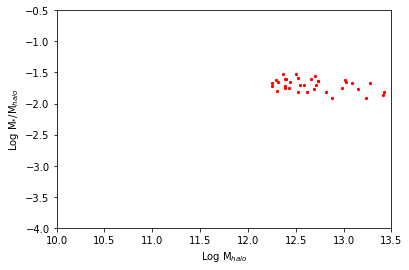

In [96]:
#plt.scatter(mhal_list,mgal_list-mhal_list, s = 5, c = 'r')
plt.scatter(group_data['mhal']-np.log10(s.properties['h']),np.log10(0.6)-group_data['mhal']+np.log10(s.properties['h'])+group_data['mgal'], s = 5, c = 'r')

plt.xlim(10,13.5)
plt.ylim(-4,-0.5)

plt.xlabel("Log M$_{halo}$")
plt.ylabel("Log M$_{*}$/M$_{halo}$")
plt.gca().patch.set_alpha(0)


In [23]:
np.sum(mvir_list>12)

27